In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

- Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

In [158]:

movies = pd.read_csv("https://raw.githubusercontent.com/IT-Academy-BCN/Data-Science/main/Pre-processing-data/movies.dat",
sep='::', encoding = 'ISO-8859-1', index_col=0, names=['TitleYear','Genres'], engine='python')

In [159]:
movies.head(60)


,TitleYear,Genres
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children's
9,Sudden Death (1995),Action
10,GoldenEye (1995),Action|Adventure|Thriller


In [160]:

movies[['Title', 'Year']] = movies['TitleYear'].str.extract(r'^(.*)\s\((\d{4})\)$')

In [161]:
movies.head()

,TitleYear,Genres,Title,Year
1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995
2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995
3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995
5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995


In [162]:
movies['Genres'] = movies['Genres'].str.split("|").str[0]
movies = movies.drop('TitleYear', axis=1)
movies = movies[['Title','Year','Genres']]
movies.head()

,Title,Year,Genres
1,Toy Story,1995,Animation
2,Jumanji,1995,Adventure
3,Grumpier Old Men,1995,Comedy
4,Waiting to Exhale,1995,Comedy
5,Father of the Bride Part II,1995,Comedy


In [163]:
movies['Year'] = movies['Year'].fillna(0)
Formatos= ['str', 'int', 'str']
dict_formatos = dict(zip(movies.columns,Formatos))
movies=movies.astype(dict_formatos)

In [164]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3883 non-null   object
 1   Year    3883 non-null   int64 
 2   Genres  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


- Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

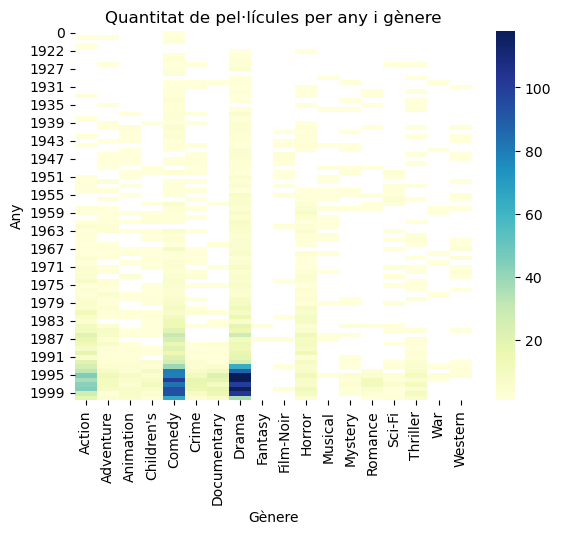

In [169]:
pivot_table = pd.pivot_table(movies, values='Title', index=['Year'], columns=['Genres'], aggfunc=len)
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Quantitat de pel·lícules per any i gènere')
plt.xlabel('Gènere')
plt.ylabel('Any')
plt.show()

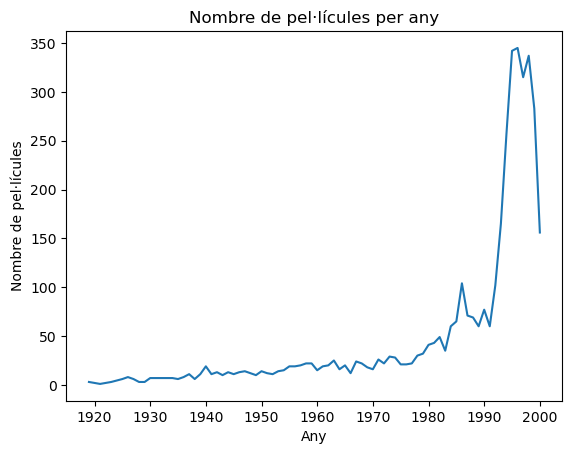

In [166]:
movies_90s = movies.loc[(movies['Year'] >= 1900) & (movies['Year'] <= 2023)]
movies_90s_count = movies_90s.groupby('Year').count()['Title']
plt.plot(movies_90s_count.index, movies_90s_count.values)
plt.title("Nombre de pel·lícules per any")
plt.xlabel('Any')
plt.ylabel('Nombre de pel·lícules')
plt.show()
